In [2]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

# $E_{so, R} \gg h_\perp$

## T vs $\alpha_L/\alpha_R$ at constant energy

In [5]:
alpha_coef = np.arange(-16, 16, 0.01)


alp_r = 8
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])

# junction.interface = x_profile
# junction.alpha_profile = Eso_profile

trasmission_coeff_total = []
enn = [0, 0.5, -0.9, 1.2, -1.0002]
lbl = []

for a in enn:
    trasmission_coeff_tmp = []
    lbl.append(f"{a}")
    for i in alpha_coef:
        
        if a < -1 and np.abs(i) < 0.5 or -np.abs(i)*(1+(1/(2*np.abs(i)))**2) > a:
            trasmission_coeff_tmp.append(np.nan)
        else:
            junction[0] = i
            S = junction.get_scattering_matrix(a)
            if not S.is_unitary:
                print(f"{a}, {i} {-np.abs(i)*(1+(1/(2*np.abs(i)))**2)} isn't unitary")
                trasmission_coeff_tmp.append(np.nan)
            else:
                trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)
    

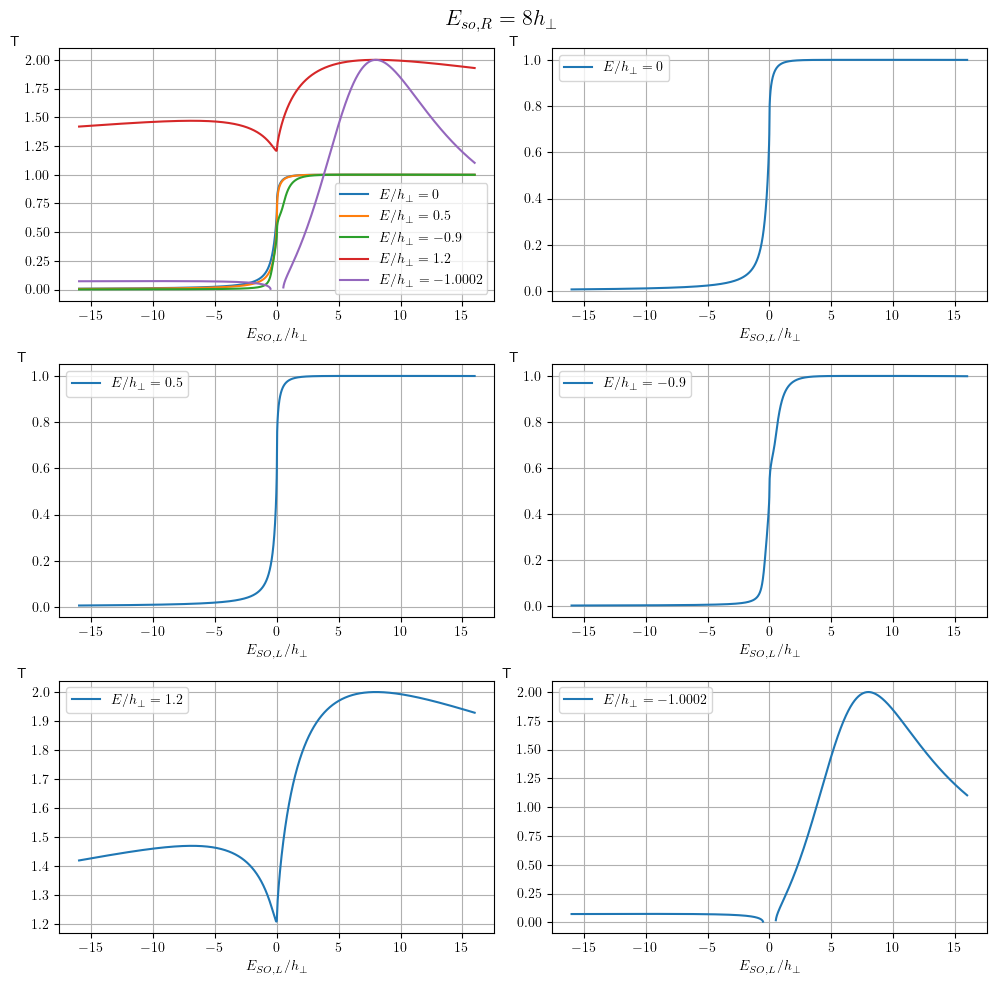

In [6]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(3, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for i in range(len(trasmission_coeff_total)):
    axs[0,0].plot(alpha_coef, trasmission_coeff_total[i], label=fr"$$ E/ h_{{\perp}} = {lbl[i]}$$")
    axs[0,0].set_xlabel(r"$$E_{SO, L}/ h_{\perp}$$")
    axs[0,0].set_ylabel("T")

    
for i in range(len(trasmission_coeff_total)+1):
    if i != 0:
        axs[(i)//2, i%2].plot(alpha_coef, trasmission_coeff_total[i-1], label=fr"$$ E/ h_{{\perp}} = {lbl[i-1]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E_{SO, L}/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=16)
      
# plt.savefig("T(E_SO) at cconstant energy.png", transparent = False)
plt.show()

## T vs E at constant $\alpha_L/\alpha_R$

In [10]:
en = np.arange(-1.5, 2, 0.011)
# en = np.arange(-0.999, 0.999, 0.0011)


alp_r = 3
# Eso_profile = [-1, alp_r]
Eso_profile = [alp_r, 1]

x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])

# # junction.interface = x_profile
# # junction.alpha_profile = Eso_profile

trasmission_coeff_total = []
# # alp = [-3, 3, -0.4, 0.4, -0.2, 0.2]
alp = [-alp_r, alp_r, -0.4, 0.4, -0.2, 0.2]

lbl = []


for a in alp:
#     print(a)
    trasmission_coeff_tmp = []
    lbl.append(f"{a}")
    for i in en:

        if i < -1 and np.abs(a) < 0.5 or -np.abs(a)*(1+(1/(2*np.abs(a)))**2) > i:
            trasmission_coeff_tmp.append(np.nan)
#             trasmission_coeff_tmp.append(0)
        else:
            junction[1] = a
            S = junction.get_scattering_matrix(i)
            if not S.is_unitary:
#                 print(f"{a}, {i} {-np.abs(i)*(1+(1/(2*np.abs(i)))**2)} isn't unitary")
                trasmission_coeff_tmp.append(np.nan)
            else:
                trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


<IPython.core.display.Javascript object>


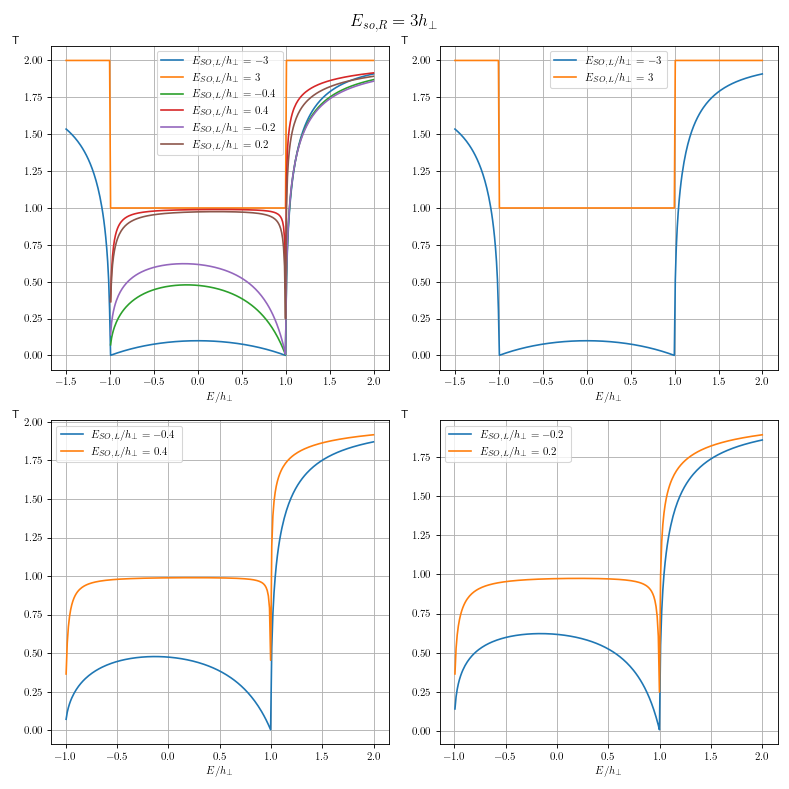

In [9]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for i in range(len(trasmission_coeff_total)):
    axs[0,0].plot(en, trasmission_coeff_total[i], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {lbl[i]}$$")
#     axs[0,0].plot(en, res[i], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {i}$$")

    axs[0,0].set_xlabel(r"$$E_{SO, L}/ h_{\perp}$$")
    axs[0,0].set_ylabel("T")

n = len(trasmission_coeff_total)
j = 1
for i in range(n//2+1):
    if i != 0:
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j-1], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {lbl[j-1]}$$")
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {lbl[j]}$$")
        j += 2
    
#     axs[i//2, i%2].set_title(fr"$$ E_{{SO, L}}/ h_{{\perp}} = {lbl[i]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

# fig.suptitle(r"$$E_{so, R} \gg h_\perp$$", fontsize=16)
fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=16)

      
# plt.savefig("T(E) at cconstant E_SO.png", transparent = False)
plt.show()

In [36]:
alp_r = 3
# Eso_profile = [-1, alp_r]
Eso_profile = [alp_r, -alp_r]

x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])


def trasmiission_real(ee, par):
    junction[1] = -par
    junction[0] = par
    S = junction.get_scattering_matrix(ee)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {parr}")
        return np.nan
    else:
        return S.t_coef

def trasmiission_expamd(ee, par):
    res = (1- ee**2)/(1-ee**2+4*par**2)
    return res
    
r = np.arange(-0.999, 0.99, 0.11)
eso = [0.6, 3, 6, 50]
res = make_grid(r, eso, [trasmiission_real, trasmiission_expamd])

E_so: 0.6 real coeff0.73527835113709
E_so: 0.6 expansion coeff0.4098164734157159
E_so: 3 real coeff0.09999270994094774
E_so: 3 expansion coeff0.02702489700045019
E_so: 6 real coeff0.02702489700044739
E_so: 6 expansion coeff0.006895996955694851
E_so: 50 real coeff0.00039980768988126574
E_so: 50 expansion coeff9.998190261959146e-05


<IPython.core.display.Javascript object>


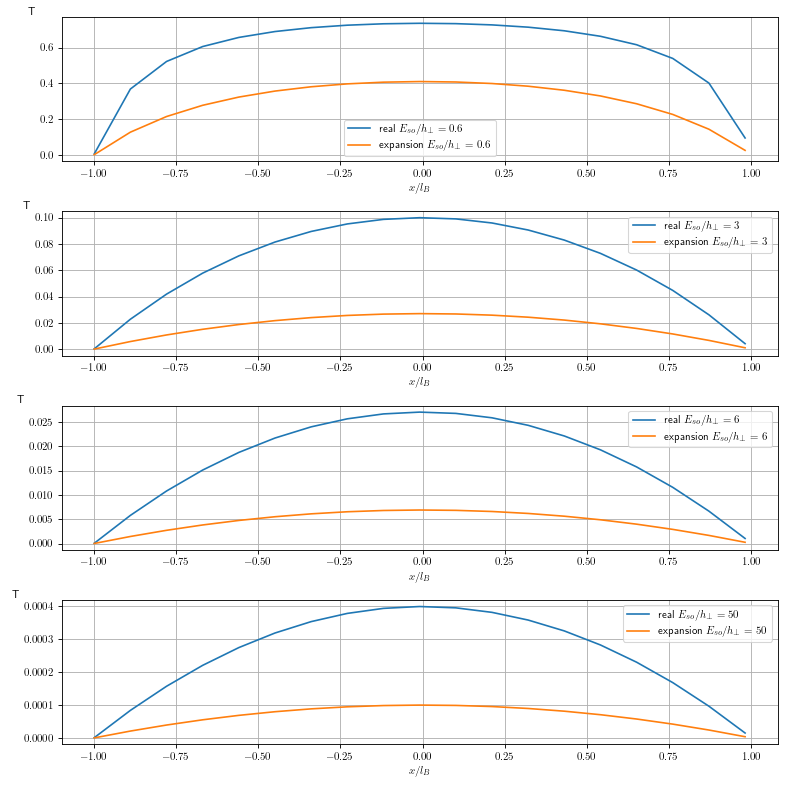

In [37]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(len(res.keys()), figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs[j].plot(r, res[k][0], label=fr"real $E_{{so}}/h_\perp = {k}$")
    axs[j].plot(r, res[k][1], label=fr"expansion $E_{{so}}/h_\perp = {k}$")
    
#     axs[k[1] //2 -1 + k[1]%2 *2 , 0].set_title(fr"norm $c_{k[1]}$ "+f"\n {m}")
    axs[j].set_xlabel(r"$x/l_B$")
    axs[j].set_ylabel("T", loc = 'top', rotation=0)
    
    axs[j].grid(True)
    axs[j].legend()

#     axs[k[1] //2 -1 + k[1]%2 *2 , 1].set_title(fr"phase/$\pi$ $c_{k[1]}$ "+f"\n {m}")
#     axs[k[1] //2 -1 + k[1]%2 *2 , 1].set_xlabel(r"$E/h_\perp$")
#     axs[k[1] //2 -1 + k[1]%2 *2 , 1].set_ylabel(fr"$\angle c_{k[1]}/\pi$", loc = 'top', rotation=0)


# fig.suptitle("Trasmission coefficient "r"$E =$"f"{ee11}", fontsize=16)


             
# plt.savefig("Trasmission coefficient(Rashba|Zeeman).pdf", transparent = False)
plt.show()

<IPython.core.display.Javascript object>


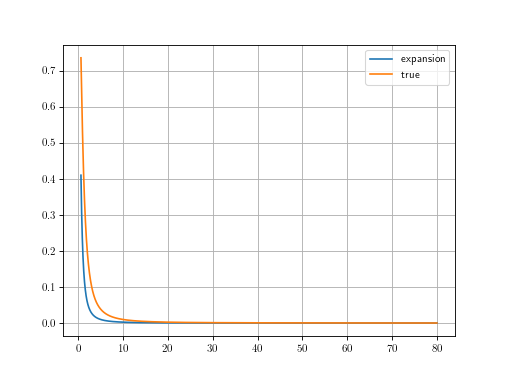

In [48]:
alp_r = 3
# Eso_profile = [-1, alp_r]
Eso_profile = [alp_r, -alp_r]

x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])

eso = np.arange(0.6, 80, 0.01)
ee = 0
err = []
trr =[]
for par in eso:
    junction[1] = -par
    junction[0] = par
    S = junction.get_scattering_matrix(ee)
    
    res = (1- ee**2)/(1-ee**2+4*par**2)
#     err.append(np.abs(S.t_coef - res))
    err.append(res)
    trr.append(S.t_coef)


fig, ax = plt.subplots()
ax.plot(eso, err, label="expansion")
ax.plot(eso, trr, label="true")


# ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#        title='About as simple as it gets, folks')
ax.grid()
ax.legend()

plt.show()

# $E_{so,R} \ll h_\perp$

## T vs $\alpha_L/\alpha_R$ at constant energy 

In [6]:
alpha_coef = np.arange(-16, 16, 0.01)


alp_r = 0.1
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RJ()

junction.interface = x_profile
junction.alpha_profile = Eso_profile


trasmission_coeff_total = []
enn = [0, 0.5, -0.9, 1.2]
lbl = []

for a in enn:
    trasmission_coeff_tmp = []
#     lbl.append(f"energy: {a}")
    lbl.append(f"{a}")  
    for i in alpha_coef:
        junction[0] = i
        S = junction.get_scattering_matrix(a)
        if not S.is_unitary:
            print(f"{i}isn't unitary")
        trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


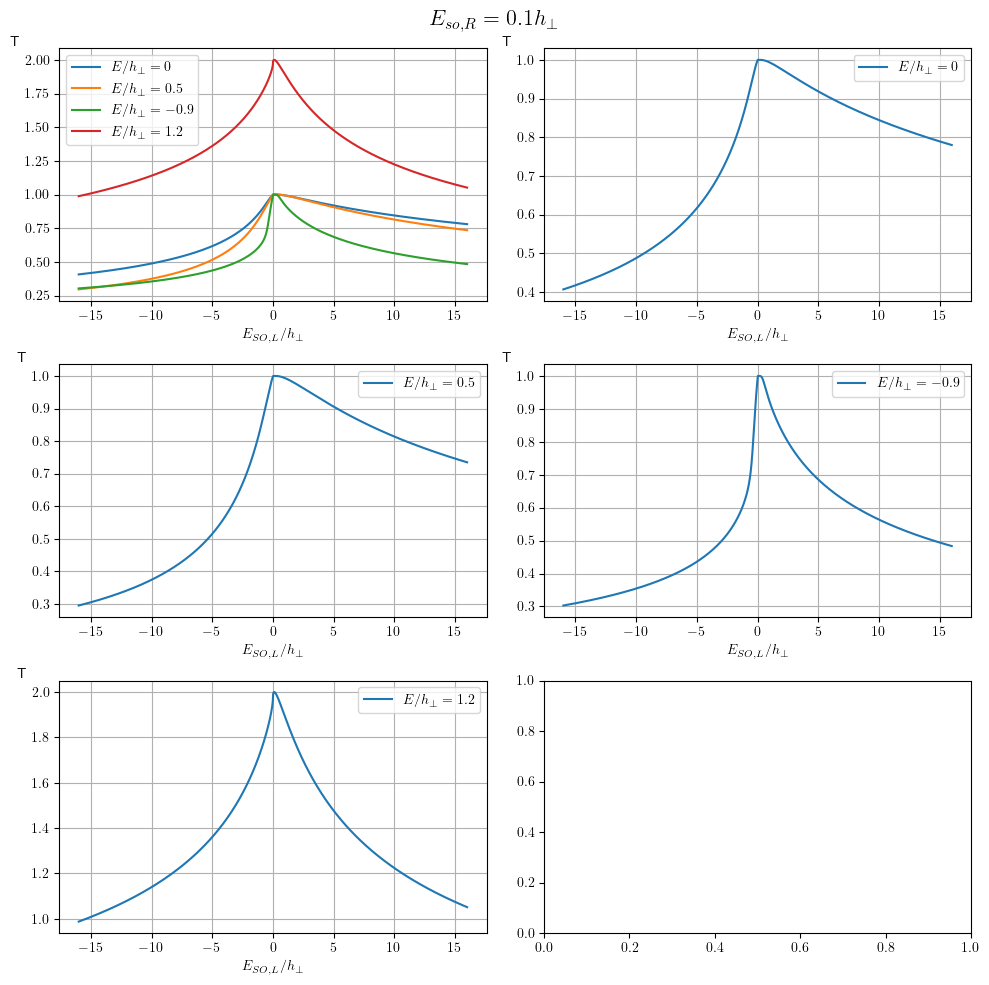

In [7]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(3, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for i in range(len(trasmission_coeff_total)):
    axs[0,0].plot(alpha_coef, trasmission_coeff_total[i], label=fr"$$ E/ h_{{\perp}} = {lbl[i]}$$")
    axs[0,0].set_xlabel(r"$$E_{SO, L}/ h_{\perp}$$")
    axs[0,0].set_ylabel("T")

    
for i in range(len(trasmission_coeff_total)+1):
    if i != 0:
        axs[(i)//2, i%2].plot(alpha_coef, trasmission_coeff_total[i-1], label=fr"$$ E/ h_{{\perp}} = {lbl[i-1]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E_{SO, L}/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

# fig.suptitle(r"$$E_{so,R} \ll h_\perp$$", fontsize=16)
fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=16)

      
plt.savefig("T(E_SO) at cconstant energy2.png", transparent = False)
plt.show()

## T vs E at constant $\alpha_L/\alpha_R$

In [5]:
en = np.arange(-0.99, 2, 0.011)
# en = np.arange(0.999, 1.0002, 0.0000011)

alp_r = 0.08
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])

# junction.interface = x_profile
# junction.alpha_profile = Eso_profile

trasmission_coeff_total = []
alp = [-4, 4, -0.4, 0.4, -0.2, 0.2]
lbl = []


for a in alp:
    trasmission_coeff_tmp = []
#     lbl.append(f"left alpha: {a}")
    lbl.append(f"{a}")
    for i in en:
        junction[0] = a
        S = junction.get_scattering_matrix(i)
        if not S.is_unitary:
            print(f"{i}isn't unitary")
        trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)


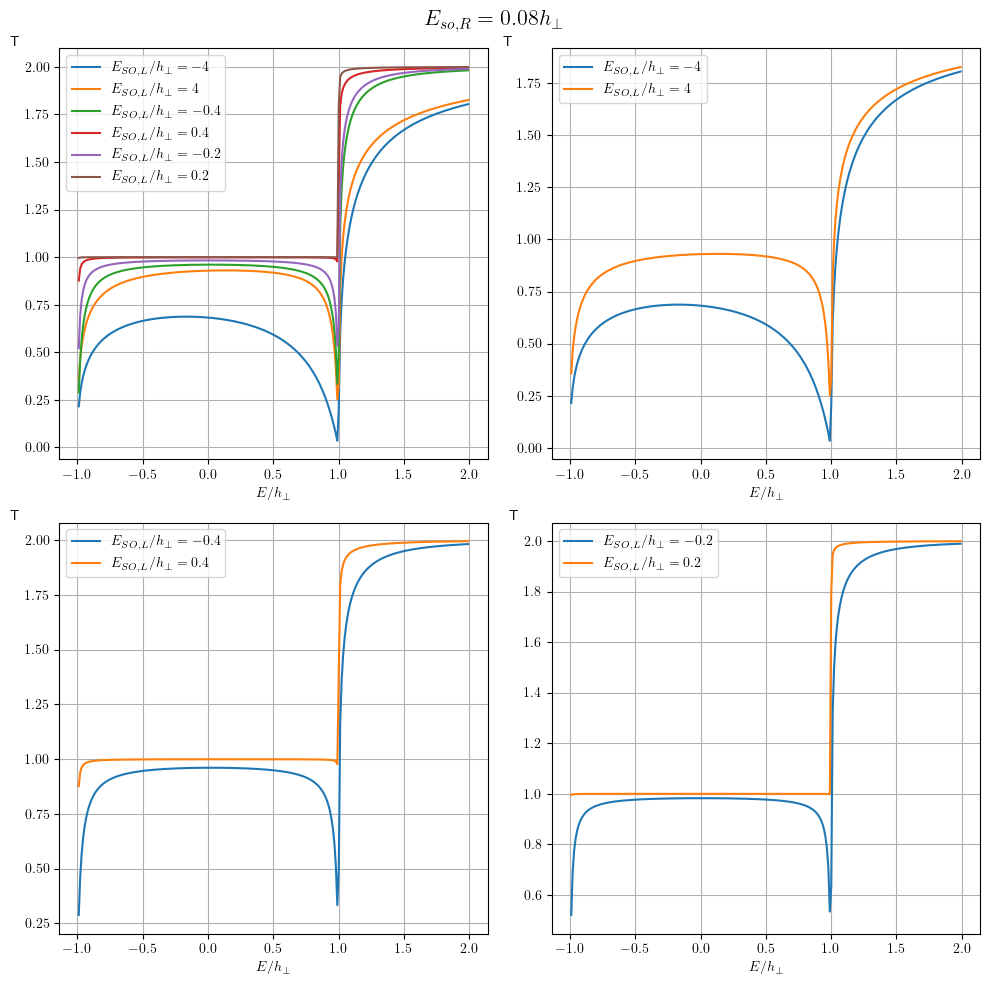

In [6]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for i in range(len(trasmission_coeff_total)):
    axs[0,0].plot(en, trasmission_coeff_total[i], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {lbl[i]}$$")
    axs[0,0].set_xlabel(r"$$E_{SO, L}/ h_{\perp}$$")
    axs[0,0].set_ylabel("T")

n = len(trasmission_coeff_total)
j = 1
for i in range(n//2+1):

    if i != 0:
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j-1], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {lbl[j-1]}$$")
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j], label=fr"$$ E_{{SO,L}}/ h_{{\perp}} = {lbl[j]}$$")
        j += 2
    
#     axs[i//2, i%2].set_title(fr"$$ E_{{SO, L}}/ h_{{\perp}} = {lbl[i]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

# fig.suptitle(r"$$E_{so, R} \ll h_\perp$$", fontsize=16)
fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=16)

      
# plt.savefig("T(E) at cconstant E_SO 2.png", transparent = False)
plt.show()

In [ ]:
ui